In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [4]:
train_dir = "C:\\Users\\user\\Desktop\\cry\\content\\test_train-original\\train"
val_dir = "C:\\Users\\user\\Desktop\\cry\\content\\test_train-original\\val"
test_dir = "C:\\Users\\user\\Desktop\\cry\\content\\test_train-original\\test"

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                          # featurewise_center=True,
                                                          # featurewise_std_normalization=True,
#                                                           rotation_range=90,
#                                                           width_shift_range=0.2,
#                                                           height_shift_range=0.2,
#                                                           horizontal_flip=True,
#                                                           zoom_range=0.2,
                                                          )

In [6]:
train_gen = datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                        shuffle=True,
                                                 class_mode = 'categorical')
test_gen= datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=False,
                                            class_mode ='categorical')
val_gen = datagen.flow_from_directory(val_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=True,
                                          class_mode = 'categorical')

Found 4077 images belonging to 20 classes.
Found 526 images belonging to 20 classes.
Found 502 images belonging to 20 classes.


In [7]:
# Visualizing data
import os 
def visualize_random_images(dataset_type="train", label_type="Downy mildew(120)"):
    
    sample = 9
    
    plt.figure(figsize=(15, 8))
    type_dir = train_dir if dataset_type=="train" else test_dir
    base_dir = os.path.join(type_dir, label_type)
    images = random.sample(os.listdir(base_dir), 9)
    
    for i, image in enumerate(images):
        plt.subplot(3, 3, i+1)
        img = plt.imread(os.path.join(base_dir, image))
        plt.imshow(img)

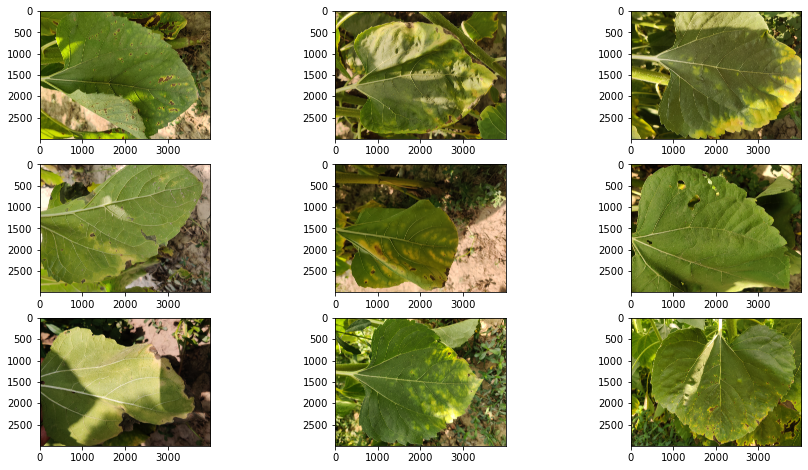

In [8]:
visualize_random_images("/content/test_train-original/train/Downy mildew(120)/downymildew.  (10).jpg")

In [9]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [10]:
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [11]:

model=Sequential()


model.add(Conv2D(32, (3, 3) ,activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, padding='same'))


model.add(Conv2D(64, (3, 3) ,activation='relu', padding='same'))
model.add(MaxPooling2D(2, padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(128, (3, 3) ,activation='relu', padding='same'))
model.add(MaxPooling2D(2, padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3) ,activation='relu', padding='same'))
model.add(MaxPooling2D(2, padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3) ,activation='relu', padding='same'))
model.add(MaxPooling2D(2, padding='same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(1024 , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(1024, activation='relu'))


model.add(Dense(20, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 64)       256       
 ormalization)                                                   
                                                        

In [13]:
# base_model = tf.keras.applications.EfficientNetB3(include_top=False)
# base_model.trainable = False

# for layer in base_model.layers[:-5]:
#   layer.trainable = False

# inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
# base_layer = base_model(inputs)

# flat_layer = layers.Flatten()(base_layer)

# outputs = layers.Dense(20, activation="softmax")(flat_layer)
# model = Model(inputs, outputs)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_gen,
                       epochs=40,
                       validation_data=val_gen)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
128/128 [==============================] - 215s 2s/step - loss: 3.8426 - accuracy: 0.2674 - val_loss: 3.8584 - val_accuracy: 0.1753
Epoch 2/40
128/128 [==============================] - 219s 2s/step - loss: 1.8020 - accuracy: 0.4479 - val_loss: 2.4926 - val_accuracy: 0.3845
Epoch 3/40
128/128 [==============================] - 205s 2s/step - loss: 1.3887 - accuracy: 0.5747 - val_loss: 2.0774 - val_accuracy: 0.4841
Epoch 4/40
128/128 [==============================] - 202s 2s/step - loss: 1.1176 - accuracy: 0.6412 - val_loss: 6.6392 - val_accuracy: 0.1375
Epoch 5/40
128/128 [==============================] - 204s 2s/step - loss: 0.8787 - accuracy: 0.7160 - val_loss: 2.4487 - val_accuracy: 0.4880
Epoch 6/40
128/128 [==============================] - 203s 2s/step - loss: 0.7464 - accuracy: 0.7616 - val_loss: 2.9021 - val_accuracy: 0.4622
Epoch 7/40
128/128 [==============================] - 201s 2s/step - loss: 0.6261 - accuracy: 0.7976 - val_loss: 1.6297 - val_accuracy: 0.5936

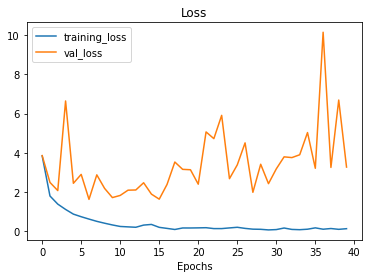

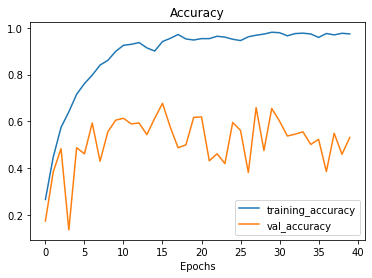

In [15]:
plot_loss_curves(history)

In [16]:
model.evaluate(test_gen)

17/17 [==============================] - 15s 941ms/step - loss: 3.1471 - accuracy: 0.5380


[3.1470892429351807, 0.5380228161811829]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from keras.utils.np_utils import to_categorical
import numpy as np
print("==============TEST RESULTS============")

num_classes = len(train_gen.class_indices)
test_labels = test_gen.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_gen, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_gen.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

# print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))

==============TEST RESULTS============
17/17 [==============================] - 11s 650ms/step
                                     precision    recall  f1-score   support

               Apple Aphis spp(162)       0.67      0.24      0.35        17
      Apple Eriosoma lanigerum(366)       0.67      0.47      0.55        38
           Apple Monillia laxa(255)       0.50      0.19      0.28        26
     Apple Venturia inaequalis(633)       0.88      0.36      0.51        64
Apricot Coryneum beijerinckii(1101)       0.71      0.72      0.71       111
          Apricot Monillia laxa(85)       0.67      0.44      0.53         9
                 Cancer symptom(76)       0.25      0.11      0.15         9
              Cherry Aphis spp(356)       0.40      0.54      0.46        37
                  Downy mildew(120)       0.32      1.00      0.49        12
                Drying symptom(156)       0.27      0.80      0.40        15
                      Gray mold(72)       0.57      1.00 

<AxesSubplot:>

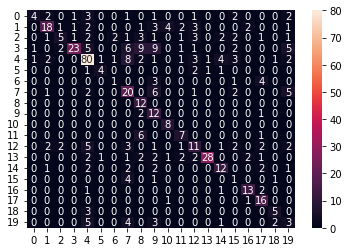

In [18]:
sns.heatmap(confusion_mtx.astype("int"), annot=True)